# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [227]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt
from numpy import load

**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [228]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Y_test = []
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    
    xPositive = [X_train[i] for i in range(n) if Y_train[i]==1]
    xNegative = [X_train[i] for i in range(n) if Y_train[i]==-1]
    
    n1 = len(xPositive)
    a = n1/n
    
    muPositive = (sum([X_train[i] for i in range(n) if Y_train[i]==1]))/n1
    muNegative = (sum([X_train[i] for i in range(n) if Y_train[i]==-1]))/(n-n1)
    
    for i in X_test:
        if a*(np.exp(-0.5*np.dot(i-muPositive,i-muPositive))) > (1-a)*(np.exp(-0.5*np.dot(i-muNegative,i-muNegative))):
            Y_test.append(1)
        else:
            Y_test.append(-1)

    return np.array(Y_test)


def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Y_test = []
    
    n = X_train.shape[0]
    d = X_train.shape[1]                              
    
    xPositive = [X_train[i] for i in range(n) if Y_train[i]==1]
    xNegative = [X_train[i] for i in range(n) if Y_train[i]==-1]
    
    n1 = len(xPositive)
    a = n1/n
    
    muPositive = (sum(xPositive))/n1
    muNegative = (sum(xNegative))/(n-n1)
    
    Sigma = np.matrix([[0 for i in range(d)] for i in range(d)])  #Initial Sigma(dXd zero matrix)
    
    for i in xPositive:
        temp = np.subtract(i,muPositive)
        Sigma = Sigma + np.dot(np.matrix(temp).transpose(),np.matrix(temp))
        
    for i in xNegative:
        temp = np.subtract(i,muNegative)
        Sigma = Sigma + np.dot(np.matrix(temp).transpose(),np.matrix(temp)) 
    
    Sigma = Sigma/n
    
    for i in X_test:
        P = i - muPositive
        Q = i - muNegative
        A = a*np.exp(-0.5*int(np.dot(np.matrix(P),np.dot(Sigma.getI(),np.matrix(P).transpose()))))
        B = (1-a)*np.exp(-0.5*int(np.dot(np.matrix(Q),np.dot(Sigma.getI(),np.matrix(Q).transpose()))))
        if A>B:
            Y_test.append(1)
        else:
            Y_test.append(-1) 
    return np.array(Y_test)
            

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Y_test = []
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    n1 = sum([1 for i in Y_train if i==1])  #Number of training set with output 1
    a = n1/n                                #a is the Probabilty of Y = 1 and (1-a) is the probability of Y = -1
    
    xPositive = [X_train[i] for i in range(n) if Y_train[i]==1]
    xNegative = [X_train[i] for i in range(n) if Y_train[i]==-1]
    
    muPositive = (sum(xPositive))/n1
    muNegative = (sum(xNegative))/(n-n1)
    
    SigmaPos = np.matrix([[0 for i in range(d)] for i in range(d)])
    SigmaNeg = np.matrix([[0 for i in range(d)] for i in range(d)])
    
    for i in xPositive:
        temp = np.subtract(i,muPositive)
        SigmaPos = SigmaPos + np.dot(np.matrix(temp).transpose(),np.matrix(temp)) 
    
    for i in xNegative:
        temp = np.subtract(i,muNegative)
        SigmaNeg = SigmaNeg + np.dot(np.matrix(temp).transpose(),np.matrix(temp)) 
    
    SigmaPos = SigmaPos/n1
    SigmaNeg = SigmaNeg/(n-n1)
    
    for i in X_test:
        P = np.matrix(i - muPositive)
        Q = np.matrix(i - muNegative)
        L = pow(abs(np.linalg.det(SigmaPos)),-0.5)
        M = pow(abs(np.linalg.det(SigmaNeg)),-0.5)
        A = a*L*np.exp(-0.5*int(np.dot(P,np.dot(SigmaPos.getI(),P.transpose()))))
        B = (1-a)*M*np.exp(-0.5*int(np.dot(Q,np.dot(SigmaNeg.getI(),Q.transpose()))))
        if A>B:
            Y_test.append(1)
        else:
            Y_test.append(-1)
            
    return np.array(Y_test)    




In [229]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_train)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_train)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_train)
'''
from numpy import load
data = load('dataset1_3.npz')
Y = data['arr_1']
n = len(Y)
count = 0
T = Bayes1b(data['arr_0'],data['arr_1'],data['arr_0'])

for i in range(n):
    if T[i] == Y[i]:
        count = count+1
#print(count/n)
'''
count = 0
n = len(Y_train)
Y_pred = Bayes1c(X_train, Y_train, X_train)
for i in range(n):
    if Y_pred[i] == Y_train[i]:
        count = count + 1
print(count/n)


0.859


**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


Graph plots and accuracies on 3 datasets using 3 classifiers

Color of predicted positve region = Yellow
Color of predicted negative region = Blue
Color of positive training points = Red
Color of Negative training points = Green


For Dataset1


CLASSIFIER A
Percentage accuracy =  87.4


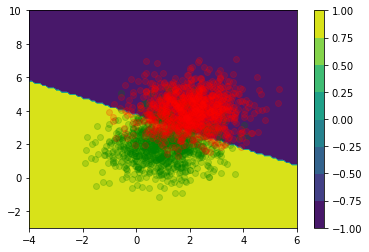

CLASSIFIER B
Percentage accuracy =  86.85


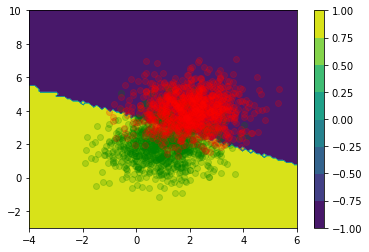

CLASSIFIER C
Percentage accuracy =  86.7


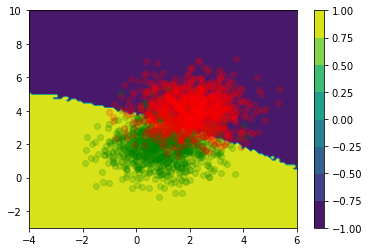



For Dataset 2


CLASSIFIER B
Percentage accuracy =  99.15


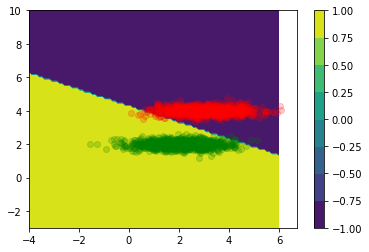

CLASSIFIER B
Percentage accuracy =  100.0


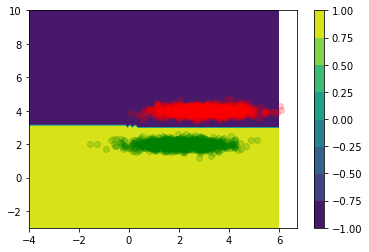

CLASSIFIER C
Percentage accuracy =  100.0


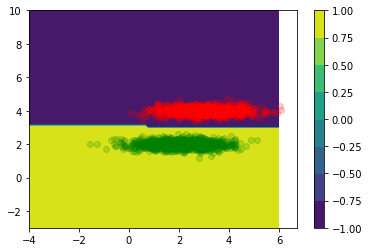



For Dataset 3


CLASSIFIER A
Percentage accuracy =  50.3


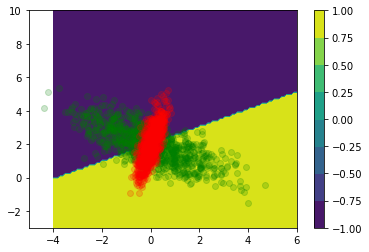

CLASSIFIER B
Percentage accuracy =  50.45


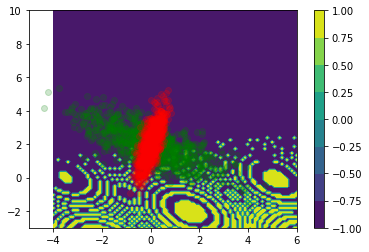

CLASSIFIER C
Percentage accuracy =  86.1


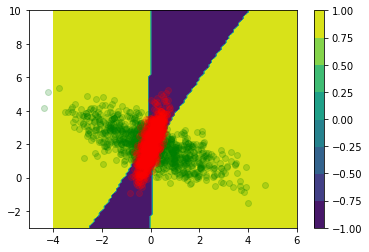

In [230]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
from numpy import load
data1 = load('dataset1_1.npz')
data2 = load('dataset1_2.npz')
data3 = load('dataset1_3.npz')

x_train1 = data1['arr_0']
x_train2 = data2['arr_0']
x_train3 = data3['arr_0']
y_train1 = data1['arr_1']
y_train2 = data2['arr_1']
y_train3 = data3['arr_1']

x_test1 = data1['arr_2']
x_test2 = data2['arr_2']
x_test3 = data3['arr_2']
y_test1 = data1['arr_3']
y_test2 = data2['arr_3']
y_test3 = data3['arr_3']

n1 = len(y_train1)
n2 = len(y_train2)
n3 = len(y_train3)

x11 = np.array([x_train1[i] for i in range(n1) if y_train1[i]==1])
x12 = np.array([x_train1[i] for i in range(n1) if y_train1[i]==-1])
x21 = np.array([x_train2[i] for i in range(n2) if y_train2[i]==1])
x22 = np.array([x_train2[i] for i in range(n2) if y_train2[i]==-1])
x31 = np.array([x_train3[i] for i in range(n3) if y_train3[i]==1])
x32 = np.array([x_train3[i] for i in range(n3) if y_train3[i]==-1])


print("Graph plots and accuracies on 3 datasets using 3 classifiers\n")

print("Color of predicted positve region = Yellow")
print("Color of predicted negative region = Blue")
print("Color of positive training points = Red")
print("Color of Negative training points = Green\n\n")

print("For Dataset1\n\n")

print("CLASSIFIER A")
Y_pred_test = Bayes1a(x_train1, y_train1, x_test1)
count = 0
for i in range(n1):
    if y_test1[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n1)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1a(x_train1,y_train1,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x11[:,0],x11[:,1],color='g',alpha=0.2)
plt.scatter(x12[:,0],x12[:,1],color='r',alpha=0.2)
plt.show()


print("CLASSIFIER B")
Y_pred_test = Bayes1b(x_train1, y_train1, x_test1)
count = 0
for i in range(n1):
    if y_test1[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n1)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1b(x_train1,y_train1,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x11[:,0],x11[:,1],color='g',alpha=0.2)
plt.scatter(x12[:,0],x12[:,1],color='r',alpha=0.2)
plt.show()

print("CLASSIFIER C")
Y_pred_test = Bayes1c(x_train1, y_train1, x_test1)
count = 0
for i in range(n1):
    if y_test1[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n1)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1c(x_train1,y_train1,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x11[:,0],x11[:,1],color='g',alpha=0.2)
plt.scatter(x12[:,0],x12[:,1],color='r',alpha=0.2)
plt.show()


print("\n\nFor Dataset 2\n\n")

print("CLASSIFIER B")
Y_pred_test = Bayes1a(x_train2, y_train2, x_test2)
count = 0
for i in range(n2):
    if y_test2[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n2)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1a(x_train2,y_train2,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x21[:,0],x21[:,1],color='g',alpha=0.2)
plt.scatter(x22[:,0],x22[:,1],color='r',alpha=0.2)
plt.show()


print("CLASSIFIER B")
Y_pred_test = Bayes1b(x_train2, y_train2, x_test2)
count = 0
for i in range(n2):
    if y_test2[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n2)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1b(x_train2,y_train2,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x21[:,0],x21[:,1],color='g',alpha=0.2)
plt.scatter(x22[:,0],x22[:,1],color='r',alpha=0.2)
plt.show()


print("CLASSIFIER C")
Y_pred_test = Bayes1c(x_train2, y_train2, x_test2)
count = 0
for i in range(n2):
    if y_test2[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n2)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1c(x_train2,y_train2,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x21[:,0],x21[:,1],color='g',alpha=0.2)
plt.scatter(x22[:,0],x22[:,1],color='r',alpha=0.2)
plt.show()


print("\n\nFor Dataset 3\n\n")

print("CLASSIFIER A")
Y_pred_test = Bayes1a(x_train3, y_train3, x_test3)
count = 0
for i in range(n3):
    if y_test3[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n3)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1a(x_train3,y_train3,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x31[:,0],x31[:,1],color='g',alpha=0.2)
plt.scatter(x32[:,0],x32[:,1],color='r',alpha=0.2)
plt.show()


print("CLASSIFIER B")
Y_pred_test = Bayes1b(x_train3, y_train3, x_test3)
count = 0
for i in range(n3):
    if y_test3[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n3)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1b(x_train3,y_train3,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x31[:,0],x31[:,1],color='g',alpha=0.2)
plt.scatter(x32[:,0],x32[:,1],color='r',alpha=0.2)
plt.show()

print("CLASSIFIER C")
Y_pred_test = Bayes1c(x_train3, y_train3, x_test3)
count = 0
for i in range(n3):
    if y_test3[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n3)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-4,6,Nx1)
X2list = np.linspace(-3,10,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes1c(x_train3,y_train3,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x31[:,0],x31[:,1],color='g',alpha=0.2)
plt.scatter(x32[:,0],x32[:,1],color='r',alpha=0.2)
plt.show()



**Accuracies of 3 classifiers on testsets of 3 datasets**

| ||First Classifier ||Second Classifier||Third Classifier| 
|-----||--------||------||--------| 
|**Dataset 1** ||87.4 ||86.85  ||86.7     | 
|**Dataset 2** || 99.15   ||100  ||100     |
|**Dataset 3** ||50.3    ||50.45   ||85.05   |

**Conclusions-**
 - For linearly separable training and test data, all three classifiers gives almost same accuracy(Dataset 1 and 2).
 - Classifier A is preferable over other two for linearly separable data, because it gives almost same accuracy as compared to other two but takes lesser time for training.
 - In case where training data of different category is overlapping a lot(in case of Dataset 3) and its not easy to seperate them using linearly separable assumption, Classifier C works best among all classifier.
 - Classifier A and B doesn't works well in all situations but Classifier C classify test data with very high accuracy for all cases.
 -For Binay Bayes Classifier we should not assume covariance to be same for both classes, it doesn't work well for all cases. 
 
**Result**
Classifier C is best among 3 classifier which works well even in case where data is not linearly separable.


** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [231]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    Y_test = []
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    L = np.matrix([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    
    x1 = [X_train[i] for i in range(n) if Y_train[i]==1]
    x2 = [X_train[i] for i in range(n) if Y_train[i]==2]
    x3 = [X_train[i] for i in range(n) if Y_train[i]==3]
    x4 = [X_train[i] for i in range(n) if Y_train[i]==4]
    
    n1 = len(x1)
    n2 = len(x2)
    n3 = len(x3)
    n4 = len(x4)
    
    mu1 = sum(x1)/n1
    mu2 = sum(x2)/n2
    mu3 = sum(x3)/n3
    mu4 = sum(x4)/n4
    
    Eta = [0,0,0,0]
    for i in X_test:
        Eta[0] = n1*np.exp(-0.5*np.dot(i-mu1,i-mu1))
        Eta[1] = n2*np.exp(-0.5*np.dot(i-mu2,i-mu2))
        Eta[2] = n3*np.exp(-0.5*np.dot(i-mu3,i-mu3))
        Eta[3] = n4*np.exp(-0.5*np.dot(i-mu4,i-mu4))
        Y_test.append(int(np.argmin(np.dot(np.matrix(Eta),L),axis=1)+1))    

    return np.array(Y_test)
  
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    Y_test = [] 
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    L = np.matrix([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    
    x1 = [X_train[i] for i in range(n) if Y_train[i]==1]
    x2 = [X_train[i] for i in range(n) if Y_train[i]==2]
    x3 = [X_train[i] for i in range(n) if Y_train[i]==3]
    x4 = [X_train[i] for i in range(n) if Y_train[i]==4]
    
    n1 = len(x1)
    n2 = len(x2)
    n3 = len(x3)
    n4 = len(x4)
    
    mu1 = sum(x1)/n1
    mu2 = sum(x2)/n2
    mu3 = sum(x3)/n3
    mu4 = sum(x4)/n4
    
    Sigma = np.matrix([[0 for i in range(d)] for i in range(d)])
    
    for i in x1:
        temp = np.matrix(np.subtract(i,mu1))
        Sigma = Sigma + np.dot(temp.transpose(),temp)
        
    for i in x2:
        temp = np.matrix(np.subtract(i,mu2))
        Sigma = Sigma + np.dot(temp.transpose(),temp)
        
    for i in x3:
        temp = np.matrix(np.subtract(i,mu3))
        Sigma = Sigma + np.dot(temp.transpose(),temp)
        
    for i in x4:
        temp = np.matrix(np.subtract(i,mu4))
        Sigma = Sigma + np.dot(temp.transpose(),temp)
        
    Sigma = Sigma/n
    
    Eta = [0,0,0,0]
    for i in X_test:
        Eta[0] = n1*np.exp(-0.5*int(np.dot(np.matrix(i-mu1),np.dot(Sigma.getI(),np.matrix(i-mu1).transpose()))))
        Eta[1] = n2*np.exp(-0.5*int(np.dot(np.matrix(i-mu2),np.dot(Sigma.getI(),np.matrix(i-mu2).transpose()))))
        Eta[2] = n3*np.exp(-0.5*int(np.dot(np.matrix(i-mu3),np.dot(Sigma.getI(),np.matrix(i-mu3).transpose()))))
        Eta[3] = n4*np.exp(-0.5*int(np.dot(np.matrix(i-mu4),np.dot(Sigma.getI(),np.matrix(i-mu4).transpose()))))
        Y_test.append(int(np.argmin(np.dot(np.matrix(Eta),L),axis=1)+1))    

    return np.array(Y_test)


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    Y_test = [] 
    
    n = X_train.shape[0]
    d = X_train.shape[1]
    L = np.matrix([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
    
    x1 = [X_train[i] for i in range(n) if Y_train[i]==1]
    x2 = [X_train[i] for i in range(n) if Y_train[i]==2]
    x3 = [X_train[i] for i in range(n) if Y_train[i]==3]
    x4 = [X_train[i] for i in range(n) if Y_train[i]==4]
    
    n1 = len(x1)
    n2 = len(x2)
    n3 = len(x3)
    n4 = len(x4)
    
    mu1 = sum(x1)/n1
    mu2 = sum(x2)/n2
    mu3 = sum(x3)/n3
    mu4 = sum(x4)/n4
    
    Sigma1 = np.matrix([[0 for i in range(d)] for i in range(d)])
    Sigma2 = np.matrix([[0 for i in range(d)] for i in range(d)])
    Sigma3 = np.matrix([[0 for i in range(d)] for i in range(d)])
    Sigma4 = np.matrix([[0 for i in range(d)] for i in range(d)])
    
    for i in x1:
        temp = np.matrix(np.subtract(i,mu1))
        Sigma1 = Sigma1 + np.dot(temp.transpose(),temp)/n1
        
    for i in x2:
        temp = np.matrix(np.subtract(i,mu2))
        Sigma2 = Sigma2 + np.dot(temp.transpose(),temp)/n2
        
    for i in x3:
        temp = np.matrix(np.subtract(i,mu3))
        Sigma3 = Sigma3 + np.dot(temp.transpose(),temp)/n3
        
    for i in x4:
        temp = np.matrix(np.subtract(i,mu4))
        Sigma4 = Sigma4 + np.dot(temp.transpose(),temp)/n4
        
    Eta = [0,0,0,0]
    for i in X_test:
        Inv1 = pow(abs(np.linalg.det(Sigma1)),-0.5)
        Inv2 = pow(abs(np.linalg.det(Sigma2)),-0.5)
        Inv3 = pow(abs(np.linalg.det(Sigma3)),-0.5)
        Inv4 = pow(abs(np.linalg.det(Sigma4)),-0.5)
        Eta[0] = n1*Inv1*np.exp(-0.5*int(np.dot(np.matrix(i-mu1),np.dot(Sigma1.getI(),np.matrix(i-mu1).transpose()))))
        Eta[1] = n2*Inv2*np.exp(-0.5*int(np.dot(np.matrix(i-mu2),np.dot(Sigma2.getI(),np.matrix(i-mu2).transpose()))))
        Eta[2] = n3*Inv3*np.exp(-0.5*int(np.dot(np.matrix(i-mu3),np.dot(Sigma3.getI(),np.matrix(i-mu3).transpose()))))
        Eta[3] = n4*Inv4*np.exp(-0.5*int(np.dot(np.matrix(i-mu4),np.dot(Sigma4.getI(),np.matrix(i-mu4).transpose()))))
        Y_test.append(int(np.argmin(np.dot(np.matrix(Eta),L),axis=1)+1))   

    return np.array(Y_test)

In [232]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)


data1 = load('dataset2_1.npz')
data2 = load('dataset2_2.npz')

x_train1 = data1['arr_0']
x_train2 = data2['arr_0']
y_train1 = data1['arr_1']
y_train2 = data2['arr_1']

x_test1 = data1['arr_2']
x_test2 = data2['arr_2']
y_test1 = data1['arr_3']
y_test2 = data2['arr_3']

n1 = len(y_test1)
n2 = len(y_test2)

Y_pred_test = Bayes2b(x_train1, y_train1, x_test1)

'''
n = np.array([[0 for i in range(4)] for i in range(4)])

for i in range(n1):
    a = int(Y_pred_test[i])
    b = int(y_test1[i])
    n[a-1][b-1] = n[a-1][b-1] + 1

print(n1)
print(n)
'''

'\nn = np.array([[0 for i in range(4)] for i in range(4)])\n\nfor i in range(n1):\n    a = int(Y_pred_test[i])\n    b = int(y_test1[i])\n    n[a-1][b-1] = n[a-1][b-1] + 1\n\nprint(n1)\nprint(n)\n'

**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


Color of y=1 points = Black
Color of y=2 points = Blue
Color of y=3 points = Green
Color of y=4 points = Yellow

Plots for Dataset 1 with three classifiers-


CLASSIFIER A
Percentage accuracy =  69.9


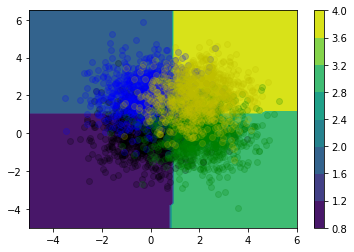

CLASSIFIER B
Percentage accuracy =  69.95


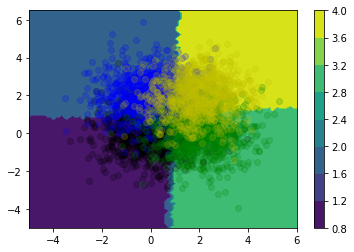

CLASSIFIER C
Percentage accuracy =  70.35


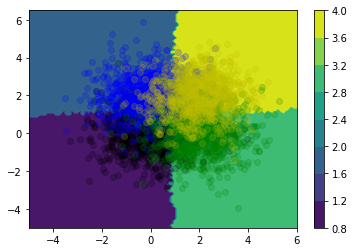



Plots for Dataset 2 with three classifiers -


CLASSIFIER A
Percentage accuracy =  85.45


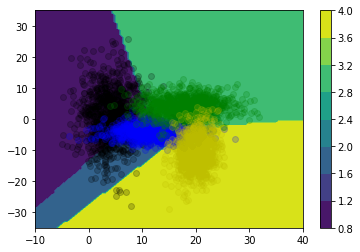

CLASSIFIER B
Percentage accuracy =  84.05


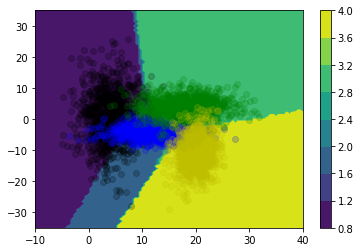

CLASSIFIER C
Percentage accuracy =  89.45


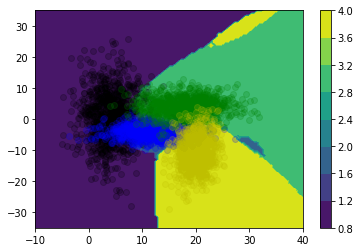

In [233]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

data1 = load('dataset2_1.npz')
data2 = load('dataset2_2.npz')

x_train1 = data1['arr_0']
x_train2 = data2['arr_0']
y_train1 = data1['arr_1']
y_train2 = data2['arr_1']

x_test1 = data1['arr_2']
x_test2 = data2['arr_2']
y_test1 = data1['arr_3']
y_test2 = data2['arr_3']

n1 = len(y_train1)
n2 = len(y_train2)
n12 = len(y_test1)
n22 = len(y_test2)

x11 = np.array([x_train1[i] for i in range(n1) if y_train1[i]==1])
x12 = np.array([x_train1[i] for i in range(n1) if y_train1[i]==2])
x13 = np.array([x_train1[i] for i in range(n1) if y_train1[i]==3])
x14 = np.array([x_train1[i] for i in range(n1) if y_train1[i]==4])
x21 = np.array([x_train2[i] for i in range(n2) if y_train2[i]==1])
x22 = np.array([x_train2[i] for i in range(n2) if y_train2[i]==2])
x23 = np.array([x_train2[i] for i in range(n2) if y_train2[i]==3])
x24 = np.array([x_train2[i] for i in range(n2) if y_train2[i]==4])


print("Color of y=1 points = Black")
print("Color of y=2 points = Blue")
print("Color of y=3 points = Green")
print("Color of y=4 points = Yellow\n")


print("Plots for Dataset 1 with three classifiers-\n\n")


print("CLASSIFIER A")
Y_pred_test = Bayes2a(x_train1, y_train1, x_test1)
count = 0
for i in range(n12):
    if y_test1[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n12)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-5,6,Nx1)
X2list = np.linspace(-5,6.5,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)
plane = Bayes2a(x_train1,y_train1,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x11[:,0],x11[:,1],color='k',alpha=0.2)
plt.scatter(x12[:,0],x12[:,1],color='b',alpha=0.2)
plt.scatter(x13[:,0],x13[:,1],color='g',alpha=0.2)
plt.scatter(x14[:,0],x14[:,1],color='y',alpha=0.2)
plt.show()


print("CLASSIFIER B")
Y_pred_test = Bayes2b(x_train1, y_train1, x_test1)
count = 0
for i in range(n12):
    if y_test1[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n12)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-5,6,Nx1)
X2list = np.linspace(-5,6.5,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes2b(x_train1,y_train1,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x11[:,0],x11[:,1],color='k',alpha=0.2)
plt.scatter(x12[:,0],x12[:,1],color='b',alpha=0.2)
plt.scatter(x13[:,0],x13[:,1],color='g',alpha=0.2)
plt.scatter(x14[:,0],x14[:,1],color='y',alpha=0.2)
plt.show()


print("CLASSIFIER C")
Y_pred_test = Bayes2c(x_train1, y_train1, x_test1)
count = 0
for i in range(n12):
    if y_test1[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n12)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-5,6,Nx1)
X2list = np.linspace(-5,6.5,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes2c(x_train1,y_train1,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x11[:,0],x11[:,1],color='k',alpha=0.2)
plt.scatter(x12[:,0],x12[:,1],color='b',alpha=0.2)
plt.scatter(x13[:,0],x13[:,1],color='g',alpha=0.2)
plt.scatter(x14[:,0],x14[:,1],color='y',alpha=0.2)
plt.show()



print("\n\nPlots for Dataset 2 with three classifiers -\n\n")


print("CLASSIFIER A")
Y_pred_test = Bayes2a(x_train2, y_train2, x_test2)
count = 0
for i in range(n22):
    if y_test2[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n22)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-10,40,Nx1)
X2list = np.linspace(-35,35,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes2a(x_train2,y_train2,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x21[:,0],x21[:,1],color='k',alpha=0.2)
plt.scatter(x22[:,0],x22[:,1],color='b',alpha=0.2)
plt.scatter(x23[:,0],x23[:,1],color='g',alpha=0.2)
plt.scatter(x24[:,0],x24[:,1],color='y',alpha=0.2)
plt.show()


print("CLASSIFIER B")
Y_pred_test = Bayes2b(x_train2, y_train2, x_test2)
count = 0
for i in range(n22):
    if y_test2[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n22)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-10,40,Nx1)
X2list = np.linspace(-35,35,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes2b(x_train2,y_train2,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x21[:,0],x21[:,1],color='k',alpha=0.2)
plt.scatter(x22[:,0],x22[:,1],color='b',alpha=0.2)
plt.scatter(x23[:,0],x23[:,1],color='g',alpha=0.2)
plt.scatter(x24[:,0],x24[:,1],color='y',alpha=0.2)
plt.show()


print("CLASSIFIER C")
Y_pred_test = Bayes2c(x_train2, y_train2, x_test2)
count = 0
for i in range(n22):
    if y_test2[i] == Y_pred_test[i]:
        count = count+1
print("Percentage accuracy = ",count*100/n22)

Nx1 = 100
Nx2 = 100
X1list = np.linspace(-10,40,Nx1)
X2list = np.linspace(-35,35,Nx2)

X1,X2 = np.meshgrid(X1list,X2list)
X = np.concatenate((np.reshape(X1,(Nx1*Nx2,1)),np.reshape(X2,(Nx1*Nx2,1))),axis=1)

plane = Bayes2c(x_train2,y_train2,X)
plane1 = np.reshape(plane,(Nx1,Nx2))

fig = plt.figure()

contour = plt.contourf(X1,X2,plane1)
plt.colorbar(contour)
plt.scatter(x21[:,0],x21[:,1],color='k',alpha=0.2)
plt.scatter(x22[:,0],x22[:,1],color='b',alpha=0.2)
plt.scatter(x23[:,0],x23[:,1],color='g',alpha=0.2)
plt.scatter(x24[:,0],x24[:,1],color='y',alpha=0.2)
plt.show()


** OBSERBATIONS ** 



**Loss Matrix**

|             ||Classifier A||Classifier B||Classifier C|
|-------------||------------||------------||------------|
|**Dataset 1**||503.15      ||656.89      ||655.28      |
|**Dataset 2**||6.71e-05    ||221.94      ||8.725       |


<br><br>
**Accuracy Matrix**

|             ||Classifier A||Classifier B||Classifier C|
|-------------||------------||------------||------------|
|**Dataset 1**||69.9        ||69.95       ||70.35       |
|**Dataset 2**||85.45       ||84.05       ||89.45       |


<br><br>
**Confusion matrix for Dataset 1**
<br>
Number of total test data point = 4000 

**Classifier A**
<br>

|               ||Actual 1||Actual 2||Actual 3||Actual 4|
|---------------||--------||--------||--------||--------|
|**Predicted 1**||633     ||97      ||86      ||15      |
|**Predicted 2**||219     ||738     ||49      ||136     |
|**Predicted 3**||136     ||62      ||770     ||194     |
|**Predicted 4**||12      ||103     ||95      ||655     |

**Classifier B**
<br>

|               ||Actual 1||Actual 2||Actual 3||Actual 4|
|---------------||--------||--------||--------||--------|
|**Predicted 1**||625     ||104     ||92      ||16      |
|**Predicted 2**||232     ||751     ||59      ||151     |
|**Predicted 3**||131     ||39      ||753     ||164     |
|**Predicted 4**||12      ||106     ||96      ||669     |

**Classifier C**
<br>

|               ||Actual 1||Actual 2||Actual 3||Actual 4|
|---------------||--------||--------||--------||--------|
|**Predicted 1**||645     ||107     ||96      ||17      |
|**Predicted 2**||184     ||722     ||29      ||120     |
|**Predicted 3**||158     ||58      ||776     ||192     |
|**Predicted 4**||13      ||113     ||99      ||671     |


<br>
**Confusion matrix for Dataset 2**
<br>
Number of total test data point = 4000 

**Classifier A**
<br>

|               ||Actual 1||Actual 2||Actual 3||Actual 4|
|---------------||--------||--------||--------||--------|
|**Predicted 1**||830     ||93      ||30      ||0       |
|**Predicted 2**||150     ||784     ||61      ||23      |
|**Predicted 3**||18      ||46      ||905     ||78      |
|**Predicted 4**||2       ||77      ||4       ||899     |

**Classifier B**
<br>

|               ||Actual 1||Actual 2||Actual 3||Actual 4|
|---------------||--------||--------||--------||--------|
|**Predicted 1**||873     ||90      ||24      ||0       |
|**Predicted 2**||124     ||721     ||101     ||4       |
|**Predicted 3**||3       ||110     ||870     ||98      |
|**Predicted 4**||0       ||79      ||5       ||898     |

**Classifier C**
<br>

|               ||Actual 1||Actual 2||Actual 3||Actual 4|
|---------------||--------||--------||--------||--------|
|**Predicted 1**||885     ||55      ||18      ||0       |
|**Predicted 2**||97      ||844     ||30      ||41      |
|**Predicted 3**||18      ||36      ||938     ||48      |
|**Predicted 4**||0       ||65      ||14      ||991     |


**Observations**
 - Classifier C works well in both datasets and give higher accuracy compared to other 2.
 - We should not presume classes of our training dataset to have same covariance, we get higher accuracy when we consider covariance to be different for all classes.


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




Degree= 1 lambda= 1e-07
Bias = 0.05430878813207818
Variance = 0.00386652346263577
MSE = [1.26105663]


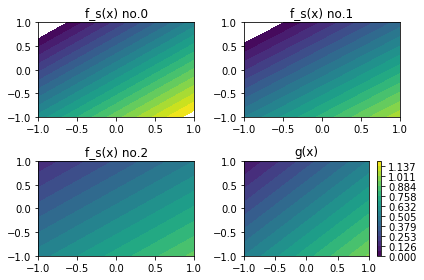

Degree= 1 lambda= 1e-05
Bias = 0.05314877872041699
Variance = 0.004016506712043157
MSE = [1.22830857]


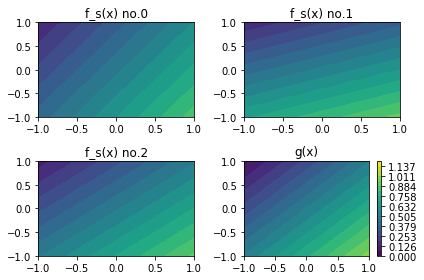

Degree= 1 lambda= 0.001
Bias = 0.05503470978967147
Variance = 0.0037853374449227494
MSE = [1.28140115]


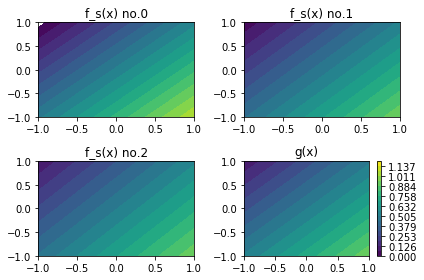

Degree= 1 lambda= 0.1
Bias = 0.053752411028327424
Variance = 0.003670330002303111
MSE = [1.26938775]


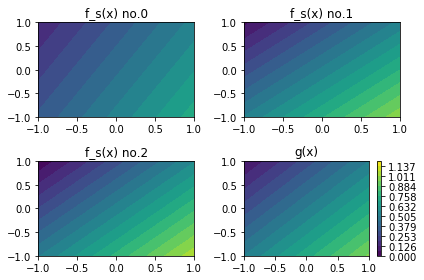

Degree= 1 lambda= 10.0
Bias = 0.06706363263768653
Variance = 0.0018615686238105619
MSE = [2.65889158]


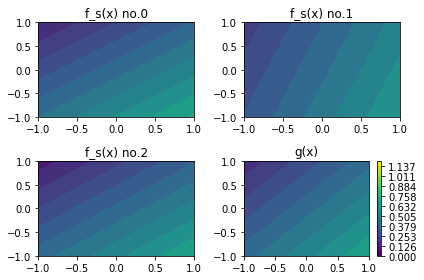

Degree= 1 lambda= 1000.0
Bias = 0.3159030089804854
Variance = 6.101701003566044e-06
MSE = [8.19360612]


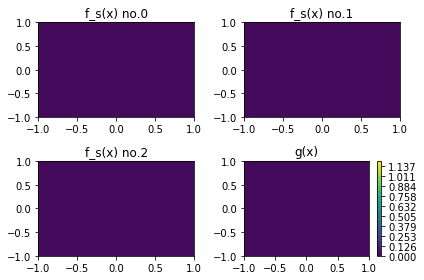

Degree= 2 lambda= 1e-07
Bias = 0.03387918681514086
Variance = 0.00416697150712768
MSE = [0.74280542]


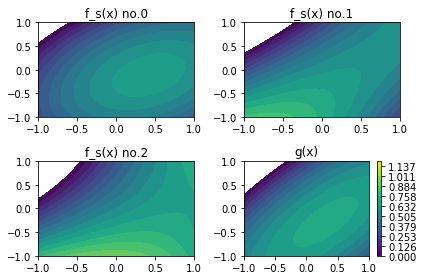

Degree= 2 lambda= 1e-05
Bias = 0.03369488740896817
Variance = 0.0044466683439664005
MSE = [0.73120911]


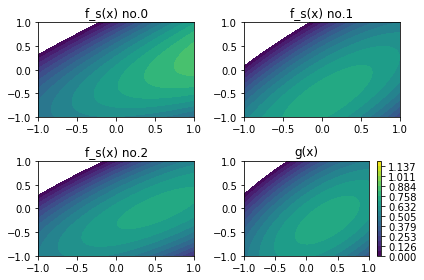

Degree= 2 lambda= 0.001
Bias = 0.034009779779464615
Variance = 0.004032955135181243
MSE = [0.74978407]


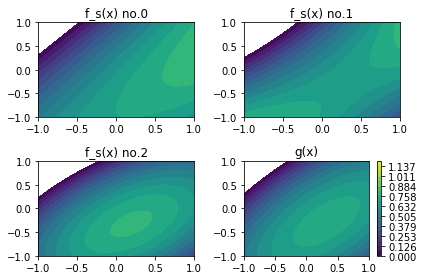

Degree= 2 lambda= 0.1
Bias = 0.033849382567610796
Variance = 0.004084616303680728
MSE = [0.78012112]


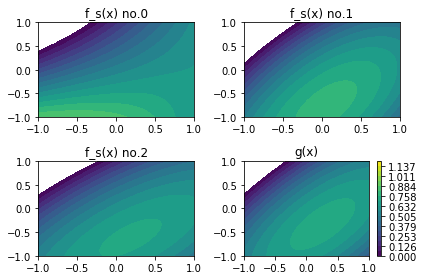

Degree= 2 lambda= 10.0
Bias = 0.06213516546700579
Variance = 0.0017339118331697522
MSE = [2.56281176]


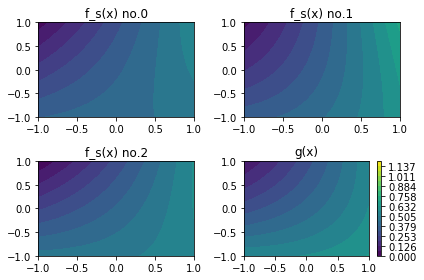

Degree= 2 lambda= 1000.0
Bias = 0.3058999717192312
Variance = 7.21132987064983e-06
MSE = [7.9798147]


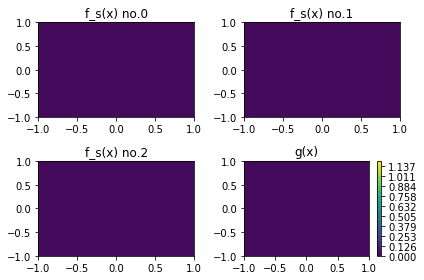

Degree= 4 lambda= 1e-07
Bias = 0.00732458001012042
Variance = 0.003606200046961645
MSE = [0.09295983]


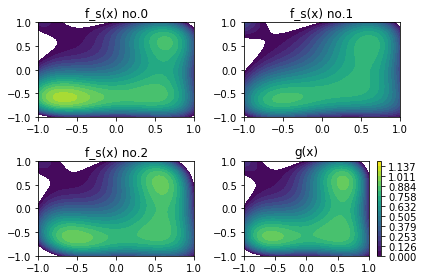

Degree= 4 lambda= 1e-05
Bias = 0.008087747321311456
Variance = 0.004491339329418323
MSE = [0.08994539]


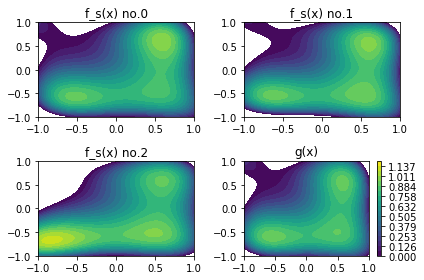

Degree= 4 lambda= 0.001
Bias = 0.0065898522430085475
Variance = 0.002940617229903906
MSE = [0.09444818]


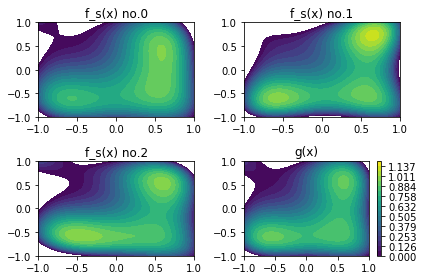

Degree= 4 lambda= 0.1
Bias = 0.009182566812045469
Variance = 0.0017598293582563975
MSE = [0.32067158]


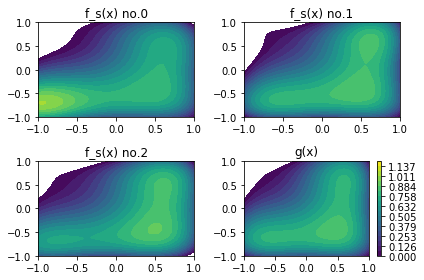

Degree= 4 lambda= 10.0
Bias = 0.058915171662147145
Variance = 0.0020119811838444214
MSE = [2.43991299]


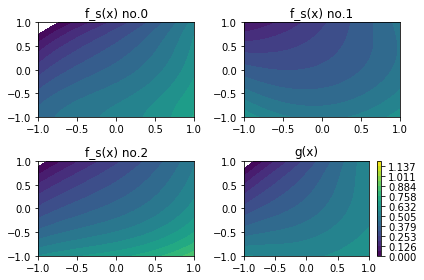

Degree= 4 lambda= 1000.0
Bias = 0.3049601361130391
Variance = 1.1801412996276813e-05
MSE = [7.96097709]


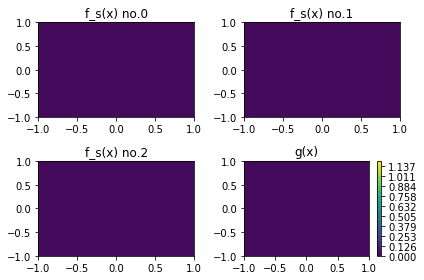

Degree= 8 lambda= 1e-07
Bias = 0.007838471159718861
Variance = 0.007836205094972374
MSE = [6.15302354e-05]


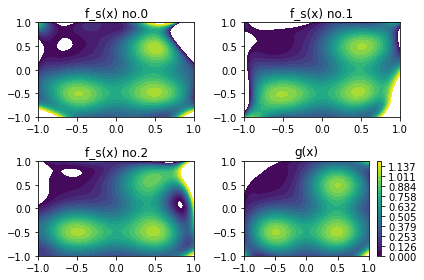

Degree= 8 lambda= 1e-05
Bias = 0.0023778065886529776
Variance = 0.002352977392048293
MSE = [0.00108863]


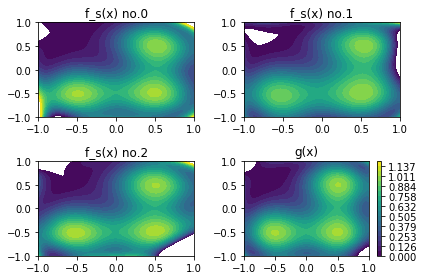

Degree= 8 lambda= 0.001
Bias = 0.004772977439030787
Variance = 0.004327469417238818
MSE = [0.02143579]


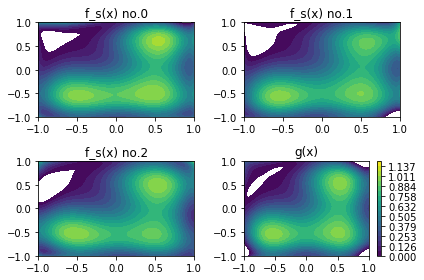

Degree= 8 lambda= 0.1
Bias = 0.009497188837641108
Variance = 0.0030121181835120812
MSE = [0.25337818]


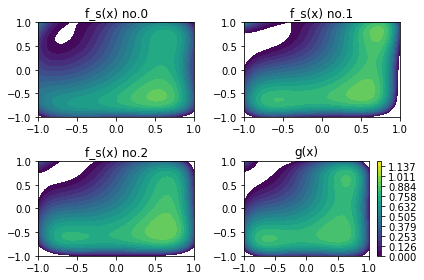

Degree= 8 lambda= 10.0
Bias = 0.0567526320942952
Variance = 0.002438315665799614
MSE = [2.43067055]


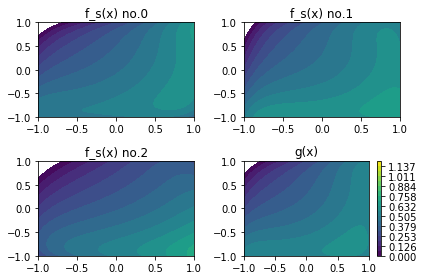

Degree= 8 lambda= 1000.0
Bias = 0.31092414549885206
Variance = 1.4994027259052536e-05
MSE = [8.12683962]


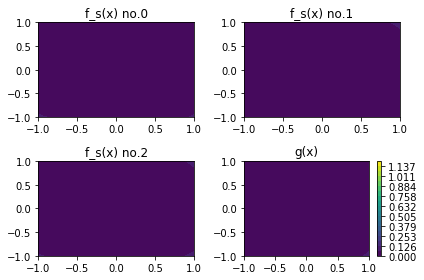

Degree= 16 lambda= 1e-07
Bias = 0.015862024324395624
Variance = 0.01586168125145303
MSE = [1.20177588e-05]


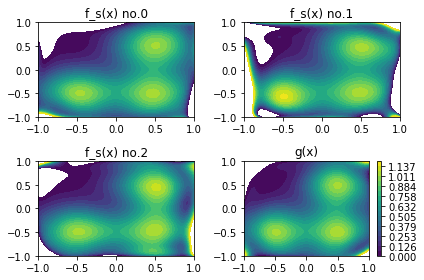

Degree= 16 lambda= 1e-05
Bias = 0.008094974259080468
Variance = 0.008081049385771142
MSE = [0.00061329]


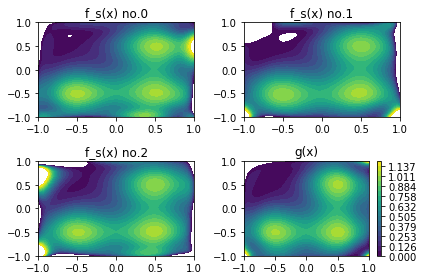

Degree= 16 lambda= 0.001
Bias = 0.004077423808925672
Variance = 0.003696925738613668
MSE = [0.01708478]


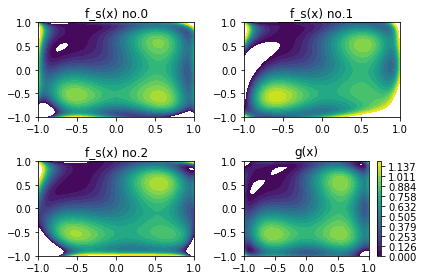

Degree= 16 lambda= 0.1
Bias = 0.011063277945539813
Variance = 0.005463687062021171
MSE = [0.22738884]


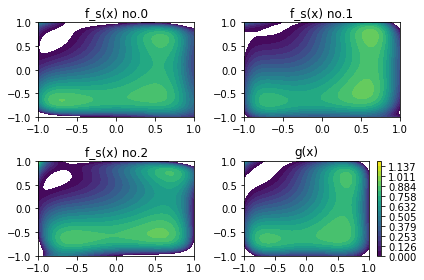

In [ ]:
# Cell type : CodeWrite
w_list=list()
b_list=list()
v_list=list()
degrees_lst=[1,2,4,8,16]
reg_param_lst=[1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]

def polynomial_regression_ridge_pred(X_test, wt_vector, degree):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    n = X_test.shape[0]
    l = list()
    
    for i in range(degree+1):
        for j in range(degree-i+1):
            l.append([i,j,degree-i-j])
    
    big_phi = np.zeros((n,len(l)))

    for h in range(n):
        x1 = X_test[h][0]
        x2 = X_test[h][1]
        for j in range(len(l)):
                big_phi[h][j] = (x1**(l[j][1]))*(x2**(l[j][2]))

    return np.dot(big_phi,wt_vector)


def give_phi_x(x):
    # x is d-cross-1. return d-dash cross 1.
    n = x.shape[0]
    l = list()
    
    for i in range(degree+1):
        for j in range(0,degree-i+1):
            l.append([i,j,degree-i-j])
    
    big_phi = np.zeros((n,len(l)))

    for h in range(n):
        x1 = x[h][0]
        x2 = x[h][1]
        for j in range(len(l)):
                big_phi[h][j] = (x1**(l[j][1]))*(x2**(l[j][2]))
    return big_phi 


def visualise_polynomial_2d(wt_vector, degree, title,a,i,j,fig):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    #fig=plt.figure()
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
    
    X_conc = np.concatenate((np.reshape(X,(100*100,1)),np.reshape(Y,(100*100,1))),axis=1)
    phi_x = give_phi_x(X_conc)
    
    phi_x_into_w = phi_x.dot(wt_vector)
    Z = np.reshape( phi_x_into_w,(100,100))

    # Get Z using other functions
    
    contour = a[i][j].contourf(X,Y,Z,levels = np.linspace(0.,1.2 , 20))
    a[i][j].set_title(title)
    
    return(contour)  


def polynomial_regression_ridge_train(X_train, Y_train, degree, reg_param):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    n = X_train.shape[0]
    l = list()
    
    for i in range(degree+1):
        for j in range(degree-i+1):
            l.append([i,j,degree-i-j])

    big_phi = np.zeros((n,len(l)))

    for h in range(n):
        x1 = X_train[h][0]
        x2 = X_train[h][1]
        for j in range(len(l)):
                big_phi[h][j] = (x1**(l[j][1]))*(x2**(l[j][2]))    
    
    w = np.linalg.inv((big_phi.transpose().dot(big_phi))+reg_param*(np.identity(len(l)))).dot(big_phi.transpose()).dot(Y_train.reshape(-1,1))

    square_error = 1/2*np.sum((big_phi.dot(w)-Y_train)**2,axis=0)+reg_param/2*(np.linalg.norm(w))**2   # finding regularise risk

    return (w,square_error)
    
    
def compute_y(x):
    return np.exp(-4*( np.linalg.norm(x-np.array([[0.5],[0.5]])))**2 )+np.exp(-4*( np.linalg.norm(x-np.array([[-0.5],[-0.5]])))**2 )+np.exp(-4*( np.linalg.norm(x-np.array([[0.5],[-0.5]])))**2 ) 
    

def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """

    global w_list
    w_list.clear()
    sample_x_list = list()
    sample_y_list = list()
    square_error_list = list()
    f_star_list = list()
    
    for h in range(100):
        a = np.zeros((1,2))
        b = np.zeros((1,1))
        flag = 0
        flag1 = 0

        for i in range(50):
            if(flag==0):
                a[0][0] = np.random.uniform(-1,1)
                a[0][1] = np.random.uniform(-1,1)
                flag = 1
            else:    
                a = np.vstack((a,np.array([[np.random.uniform(-1,1),np.random.uniform(-1,1)]])))   # Construct 50 cross 2 'a' for a sample 

        for i in range(0,50):
            if(flag1==0):
                m = compute_y(a[i].reshape(-1,1))
                b[0][0] = m
                flag1 = 1
            else: 
                b = np.vstack((b,np.array([[compute_y(a[i].reshape(-1,1))]])))
        f_star_list.append(b)    # f_star_list has all the n-cross-1 y_lists of all the 100 samples.       

        sample_x_list.append(a)  #sample_x_list has all the 50-cross-2 x_lists of all the 100 samples.
        sample_y_list.append(b)
        
        w,square_error = polynomial_regression_ridge_train(a,b,degree,reg_param) # get w, sq error for a sample. Note that w is 50 cross d-_dash, not 50 cross d,i.e, 50_cross_2
        w_list.append(w)
        square_error_list.append(square_error)
        
    g = sum(w_list)/len(w_list)  #avg of w across all samples

    sum_v = 0
    list_v = list()
    
    sum_b = 0
    
    for sample_no in range(len(sample_x_list)):  # for each sample
        arr_x = sample_x_list[sample_no]          #arr_x is array of the 50 x's in current sample
        arr_y = sample_y_list[sample_no]
        w_curr = w_list[sample_no] 
                                                 # get current sample's w,X,Y
        phi_curr_x = give_phi_x(arr_x)
        
        f_s_x = phi_curr_x.dot(w_curr)            # f_s_x is n_cross_1.
        g_x = phi_curr_x.dot(g)                   # 1 g_x per sample
        
        diff = g_x-f_star_list[sample_no]         # g_x, f_star_x are n cross 1, i.e, 50 cross 1
        
        sum_b += np.sum(diff**2,axis=0)[0]        # We find norm_sqquare of g_x-f_star_list[sample_no] across all samples, and finally, divide sun_b by total # of x's, i.e, 5000
        
        
        sum_v = np.sum((f_s_x-g_x)**2,axis=0)     # find norm_square of (f_s_x-g_x), and add (f_s_x-g_x)/50 to list. We do this for all samples
       # print("sum_v ",sum_v)
        list_v.append(sum_v[0]/f_s_x.shape[0])
    
    v = sum(list_v)/len(list_v)
    b = sum_b/5000
    
    mean_sq_error = sum(square_error_list)/len(square_error_list)
 
    return (b,v,mean_sq_error,g)
    
for degree in [1,2,4,8,16]:
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        #plt.figure()
        b,v,e,g = compute_BV_error_sample_plot(degree, reg_param,50)
        
        b_list.append(b)
        v_list.append(v)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        
        fig,a =  plt.subplots(nrows=2,ncols=2)
        #plt.title("degree: "+str(degree)+", regularization parameter: "+str(reg_param))
        count=0
        
        for i in range(0,3):
            strr = "f_s(x) no."+str(i)
            if(count<2):
                cont = visualise_polynomial_2d(w_list[i], degree,strr,a,0,i,fig)
                #plt.colorbar(cont)
            else:
                cont = visualise_polynomial_2d(w_list[i], degree,strr,a,1,0,fig)
                plt.colorbar(cont)
            count+=1    
        #plt.show() 
        strr = "g(x)"
        cont = visualise_polynomial_2d(g, degree,strr,a,1,1,fig)
        #plt.title("degree: "+str(degree)+", regularization parameter: "+str(reg_param))
        #plt.colorbar(cont)
        fig.tight_layout()
        plt.show()  
        
        #plt.set_title("degree: "+str(degree)+", regularization parameter: "+str(reg_param))
table_data = np.empty([5,6],dtype=object)


for i in range(0,5):
    for j in range(0,6):
        s = "bias= "+str(b_list[6*i+j])+", variance= "+str(v_list[6*i+j])
        table_data[i][j] = s

fig = plt.figure(dpi=80)

table = plt.table(cellText=table_data, loc='center', rowLabels=degrees_lst,colLabels=reg_param_lst)
table.set_fontsize(10)
table.scale(10,10)
plt.axis('off')
plt.xlabel("Regularization Parameter")
plt.ylabel("Degree")
    

In [ ]:
# Cell type: convenience




**Bias matrix 5(degree)X6(lambda)**

|         ||1e-7||1e-5||1e-3||0.1||10||1000|
|---------||----||----||----||---||--||----|
| **Degree 1**||0.05412||0.05396||0.05579||0.05429||0.06337||0.31816|
|**Degree 2**||0.034000||0.03359||0.03397||0.03494||0.61056||0.31184|
|**Degree 4**||0.00740||0.00753||0.00719||0.00894||0.06022||0.30914|
|**Degree 8**||0.00442||0.00442||0.00504||0.00935||0.05596||0.30174|
|**Degree 16**||0.01231||0.01222||0.00481||0.01042||0.05271||0.30686|

**Vairiance matrix 5(degree)X6(lambda)**

|         ||1e-7||1e-5||1e-3||0.1||10||1000|
|---------||----||----||----||---||--||----|
|**Degree 1**||0.00339||0.0033||0.00329||0.00329||0.00155||0.0000622|
|**Degree 2**||0.00441||0.00444||0.00437||0.00409||0.00208||0.0000821|
|**Degree 4**||0.00374||0.00396||0.00355||0.00175||0.00200||0.000011|
|**Degree 8**||0.09732||0.00439||0.00459||0.00293||0.00215||0.000012|
|**Degree 16**||0.01231||0.01221||0.00442||0.00475||0.00222||0.000021|

**MSE matrix 5(degree)X6(lambda)**

|         ||1e-7||1e-5||1e-3||0.1||10||1000|
|---------||----||----||----||---||--||----|
|**Degree 1**||1.2682||1.2669||1.3126||1.2917||2.5811||8.2529|
|**Degree 2**||0.73984||0.72864||0.74020||0.80692||2.4984||8.1334|
|**Degree 4**||0.09151||0.08930||0.09407||0.3120||2.5131||8.0751|
|**Degree 8**||0.000055||0.00102||0.02143||0.25081||2.4131||7.8916|
|**Degree 16**||0.0000122||0.00061||0.1707||0.2309||2.333||8.0267|


**Observations from tables**
1) Across the row: Our degree is same, and we are only increasing regularization parameter. So. we are reducing flexibility of the curve,
                   and variance should decrease. As can be seen from 1st row of table, variance is decreasing from 0.0038 to  5.3e-06
                   Hence, as we are trying to make the curve more 'simple' by increasing the regularization parameter, the rigidity will result in high bias.
                   Also, note that bias is increasing from 0.05 to 0.3, satisfying the bias-variance tradeoff. 
                
2) Across the column: Regularization parameter is constant, but our degree is increasing. So, our curve is gaining flexibility as degree is increasing, but we are doing nothing to check overfitting, as regularization parameter is constant.
                      So, variance should increase,and it is increasing from 0.003 to 0.02 for the 1st column. Bias, then, should decrease, and it is decreasing, in general, like from 0.05 to 0.005 for 3rd column.

So, note that the least bias can be found on bottom left corner of table, and least variance can be found on upper right corner of table.

NOTE: The color bar against g(x) actually also applies to the other 3 f_s(x) plotted for 3 samples, for a given degree and regularization parameter 

<br>
**Result**
 - We got least MSE when we are taking lambda to be 1e-7 and considering model of degree 16


** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




--------------No. of data points:  50 -----------------
reg_param_final:  0.001
degree_final:  4


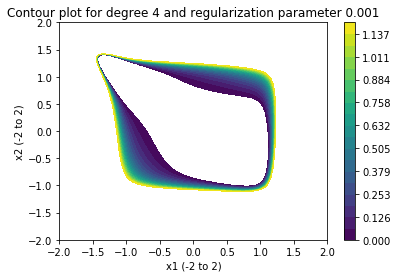

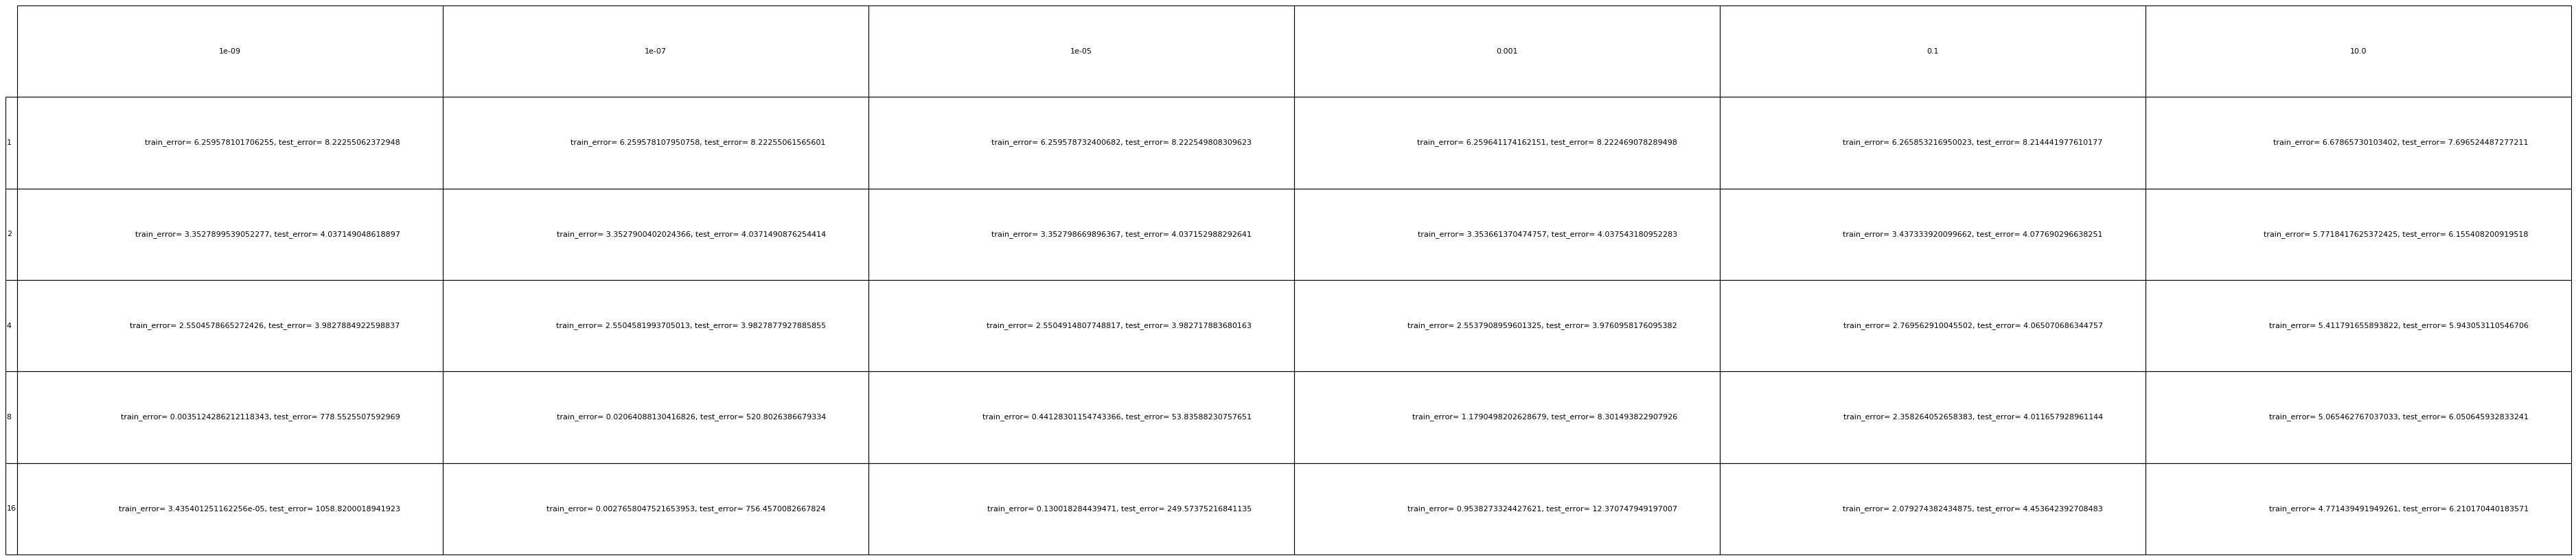

--------------No. of data points:  100 -----------------
reg_param_final:  0.001
degree_final:  8


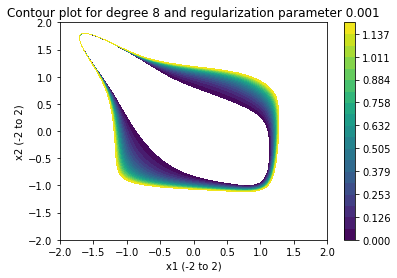

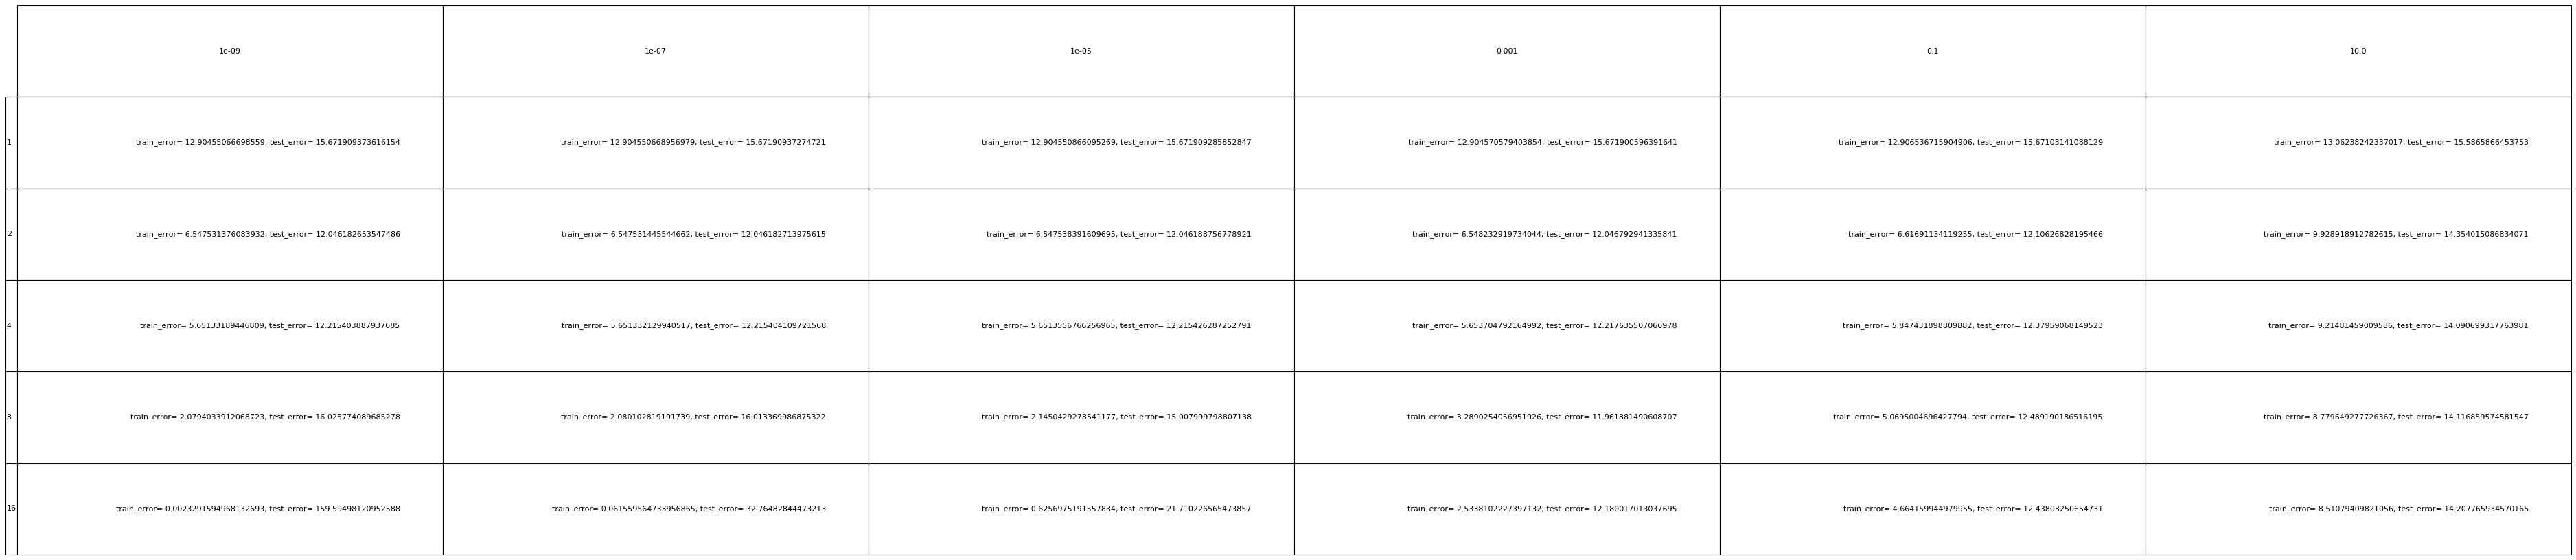

--------------No. of data points:  200 -----------------
reg_param_final:  1e-09
degree_final:  16


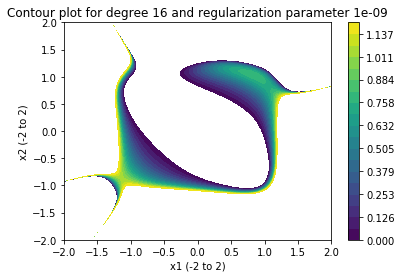

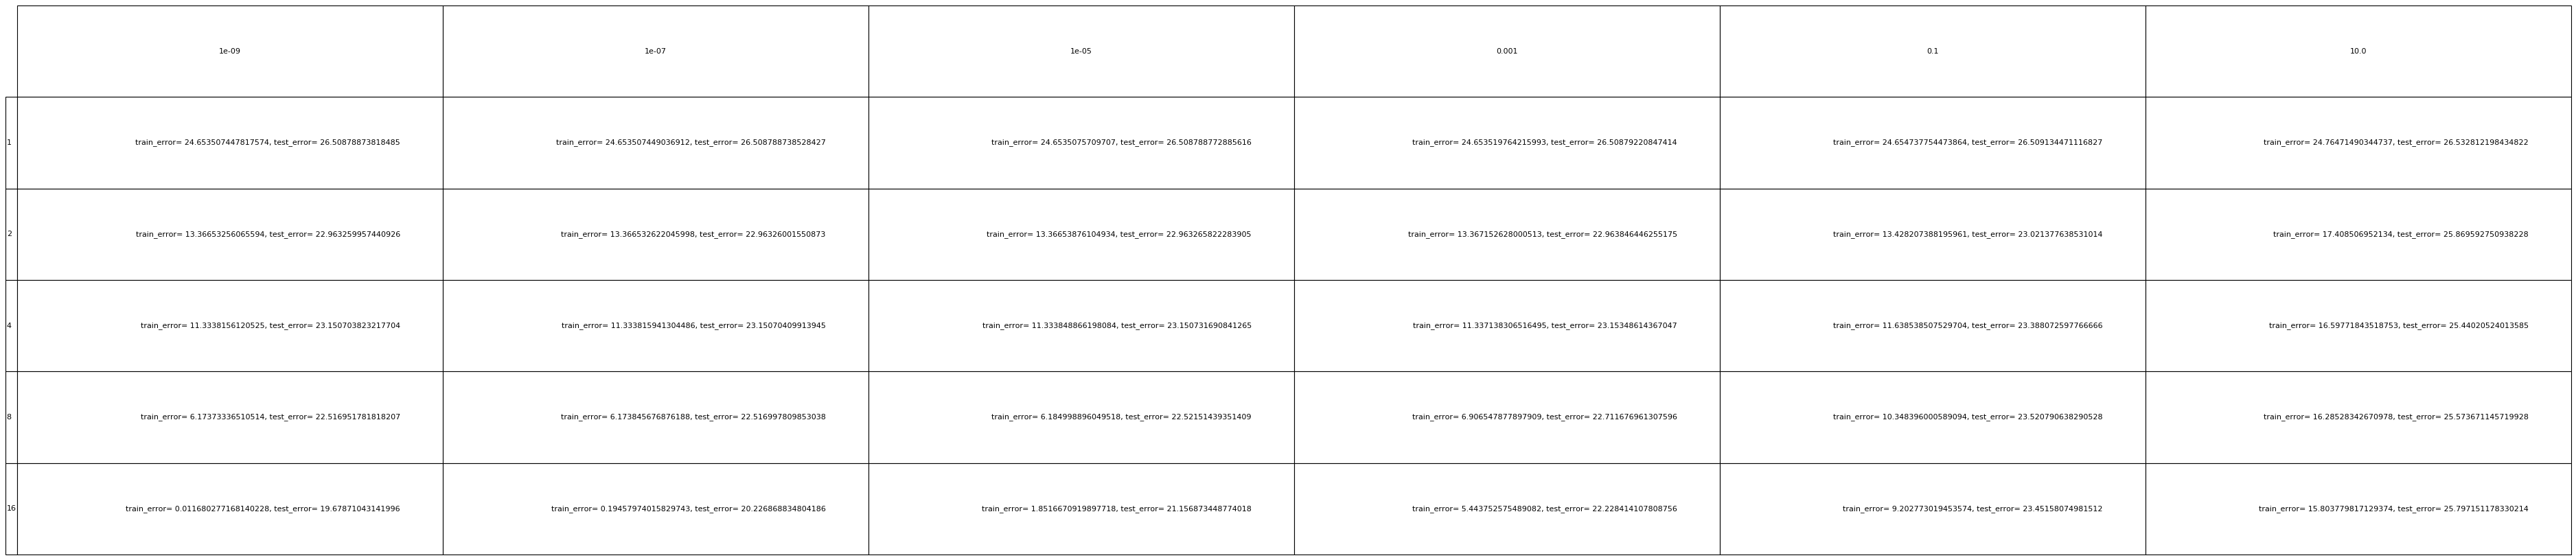

--------------No. of data points:  1000 -----------------
reg_param_final:  1e-09
degree_final:  16


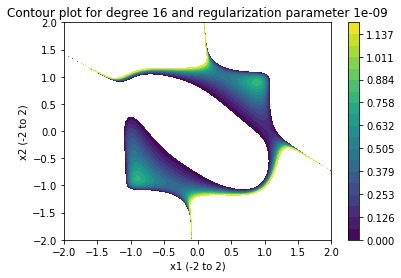

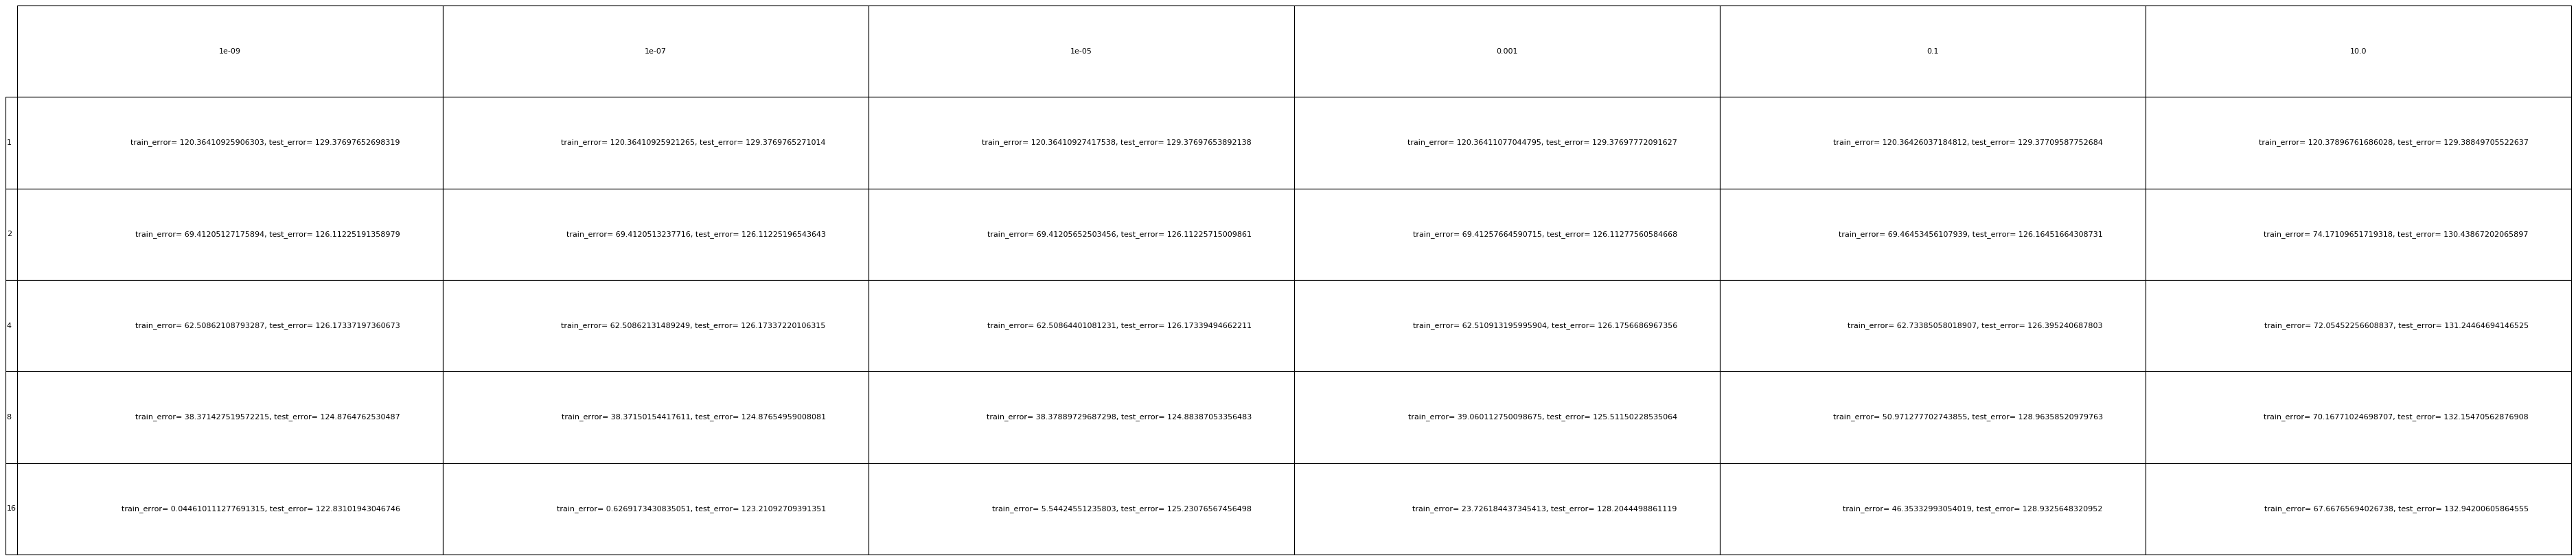

In [226]:
# Cell type : CodeWrite 
data1 = load("dataset4_1.npz")
x_train = data1['arr_0']
y_train = data1['arr_1']
x_test = data1['arr_2']
y_test = data1['arr_3']

degrees = [1,2,4,8,16]
reg_param = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]
d = [50,100,200,1000]

train_err=list()
test_err=list()

#def contour_ret(w,)
def vision_q_4(wt_vector, degree, title):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    fig = plt.figure()
    X,Y = np.meshgrid(np.linspace(-2,2,100), np.linspace(-2,2,100))
    
    X_conc = np.concatenate((np.reshape(X,(100*100,1)),np.reshape(Y,(100*100,1))),axis=1)
    
    phi_x = give_phi_x(X_conc)
    
    
    phi_x_into_w = phi_x.dot(wt_vector)
    Z = np.reshape( phi_x_into_w,(100,100))

    # Get Z using other functions
    
    contour = plt.contourf(X,Y,Z,levels=np.linspace(0.,1.2 , 20))
    plt.title(title)
    plt.colorbar(contour)
    plt.xlabel("x1 (-2 to 2)")
    plt.ylabel("x2 (-2 to 2)")
    plt.show()

def get_I(X,degree,y,lamda,x_test,y_test):
    
    n = X.shape[0]
    l = list()
    
    for i in range(degree+1):
        for j in range(degree-i+1):
            l.append([i,j,degree-i-j])
    
    big_phi = np.zeros((n,len(l)))

    for h in range(n):
        x1 = X[h][0]
        x2 = X[h][1]
        for j in range(len(l)):
                big_phi[h][j] = (x1**(l[j][1]))*(x2**(l[j][2]))
                 
    
    w = np.linalg.inv((big_phi.transpose().dot(big_phi))+lamda*(np.identity(len(l)))).dot(big_phi.transpose()).dot(y.reshape(-1,1))
    
    train_error = 0.5*( (np.linalg.norm((big_phi).dot(w)-y.reshape(-1,1)))**2 )+lamda/2*((np.linalg.norm(w))**2)
    
    big_phi_test = np.zeros((n,len(l)))
    
    for k in range(x_test.shape[0]):
        x1 = x_test[k][0]
        x2 = x_test[k][1]
        for j in range(len(l)):
            big_phi_test[k][j] = (x1**(l[j][1]))*(x2**(l[j][2]))
     
    test_error = 0.5*( (np.linalg.norm((big_phi_test).dot(w)-y_test.reshape(-1,1)))**2 )+lamda/2*((np.linalg.norm(w))**2)
    
    return (train_error,test_error,degree,lamda,w,big_phi_test,x_test)


min_error=-1
degree_final=-1
reg_param_final=-1
train_error_final=-1
test_error_final=-1

for d_i in range(4):
    initial_table_flag = 1       
    print("--------------No. of data points: ",d[d_i],"-----------------")
    train_err.clear()
    test_err.clear()
    min_error = -1
    degree_final = -1
    reg_param_final = -1
    for i in range(len(degrees)):
        for j in range(len(reg_param)): 
            train_error,test_error,degree_ret,reg_param_ret,w,big_phi_test,x_test = get_I(x_train[:d[d_i] ],degrees[i],y_train[:d[d_i] ],reg_param[j],x_test[:d[d_i]],y_test[:d[d_i]])
            train_err.append(train_error)
            test_err.append(test_error) 
            
            if(min_error==-1):
                min_error = test_error
                degree_final = degree_ret
                reg_param_final = reg_param_ret
                w_final = w
                big_phi_test_final = big_phi_test
                x_test_final = x_test
            else:
                if(min_error>test_error):
                    min_error = test_error
                    degree_final = degree_ret
                    reg_param_final = reg_param_ret  
                    w_final = w
                    big_phi_test_final = big_phi_test
                    x_test_final = x_test

    print("reg_param_final: ",reg_param_final)                
    print("degree_final: ",degree_final)
    
    strr = "Contour plot for degree "+str(degree_final)+" and regularization parameter "+str(reg_param_final)
    vision_q_4(w, degree_final,strr)
    
    table_data = np.empty([5,6],dtype=object)


    for i in range(5):
        for j in range(6):
            s = "train_error= "+str(train_err[6*i+j])+", test_error= "+str(test_err[6*i+j])
            table_data[i][j] = s

    fig = plt.figure(dpi=80)
    
    #plt.title("Train and test error for degree: "+str(degree_final)+" and regularization parameter: "+str(reg_param_final))
    table = plt.table(cellText=table_data, loc='center',rowLabels=degrees,colLabels=reg_param)
    table.set_fontsize(10)
    table.scale(10,10)
    plt.axis('off')
    plt.xlabel("Regularization Parameter")
    plt.ylabel("Degree")
    plt.show()


**Set size 50**
<br>
**Training error matrix**

|        ||1e-09||1e-07||1e-05||1e-03||0.1||10|
|--------||-----||-----||-----||-----||---||--|
|**Degree 1**||6.56||6.259||6.259||6.259||6.2658||6.678|
|**Degree 2**||3.3527||3.3528||3.35279||3.35||3.437||5.77|
|**Degree 4**||2.5504||2.5504||2.550||2.553||2.769||5.411|
|**Degree 8**||0.35||0.0206||0.44128||1.179||2.358||5.065|
|**Degree 16**||3.435||0.00276||0.13||0.953||2.076||4.771|

**Test error matrix**

|        ||1e-09||1e-07||1e-05||1e-03||0.1||10|
|--------||-----||-----||-----||-----||---||--|
|**Degree 1**||8.22||8.22||8.22||8.22||8.214||7.696||
|**Degree 2**||4.037||4.037||4.037||4.037||4.0776||6.1554|
|**Degree 4**||3.9827||3.982||3.98||3.976||4.065||5.943|
|**Degree 8**||778.55||520.80||53.835||8.301||4.0116||6.0506|
|**Degree 16**||1058.8||756.45||249.57||12.37||4.453||6.21|

<br>
NOTE: Training and test error matrix for set size 50,100,200,1000 are plotted by running above program.
<br><br>
**Inferences**<br>
1) For less no. of data points, when the degree is high, and regularization parameter is low, which are the bottom left cells of table, the train-error is very low, in the range of 0.001s, but the test_error is very high, in the range of hundreds, and even thousands. This shows perfect overfitting.

2) Note that as no. of data points increases, high degree polynomials no longer result in overfitting, even if regularization parameter is less. Thus, when no of data points=1000, regularization parameter=1e-09 and degree=16 no longer causes overfitting.
But when no. of data points is less, we need a lower degree polynomial, and higher regularization parameter to check overfitting, like, regularization parameter=0.001 and degree=8 for 100 data points.

3) In case of 1000 data points, note that there is large variation in train_error, but very low in test_error.Here, train_error in 1st column itself goes from 120 at top to 0.04 at bottom. Variation in train_error is due to higher degree polynomial. But, test_error is in 120s for almost all cells, which shows a high, but a uniform error. This is again due to high degree polynomial. 
The high number of points is making dependency on regularization parameter redundant here. However, note that in case of 50 data points, for the same row with degree 16, the test_error rapidly fell across columns from 1059 to 6.2. This shows high regularization parameter sensitivity for less number of data points. In case of train_error too, there is high variation in case of 50 data points case for degree 16, i.e, ranging from e-05 to 8, while as no. of data points increases, error as an average increases, but its variation, comparatively, decreases(tho is still large compared to test_error). 
The train error for less no. of data points is in fact, even e-05 for degree=16. This increases to to 0.04 for 1000 data points. 